In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
e_n = 1.0 # energy
t_n = 1.0 # amplitude for hopping (|r| = 1)


N = 20 # length of cume

def gen_triples(N):
    i, j, k = (0, 0, 0)
    coords = []
    for i in range(N):
        for j in range(N):
            for k in range(N):
                coords.append((i,j,k))

    return coords


tic = time.time()   

coords = gen_triples(N)
mapping = {i: coords[i] for i in range(len(coords))}
inv_mapping = {coords[i]: i for i in range(len(coords))}
print(inv_mapping[(1,4,2)])
# print (coords)
toc = time.time()
print (toc-tic)


sites = N**3
H = np.zeros((sites, sites), dtype = float)
for i in range(sites):
    x, y, z = mapping[i]
    H[i, i] = e_n
    if (z + 1 < N):
        H[i, i+1] = t_n
    if y + 1 < N:
        H[i, i+N] = t_n
    if x + 1 < N:
        H[i, i+N**2] = t_n
    if z > 0:
        H[i, i-1] = t_n
    if y > 0:
        H[i, i-N] = t_n
    if x > 0:
        H[i, i-N**2] = t_n

w, v = np.linalg.eigh(H)

# np.save("eigenvector", v)
# np.save("eigenvalue", w)

482
0.03125309944152832


In [12]:
import numpy as np
v = np.load("eigenvector.npy")
w = np.load("eigenvalue.npy")

In [6]:
H

array([[ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.]])

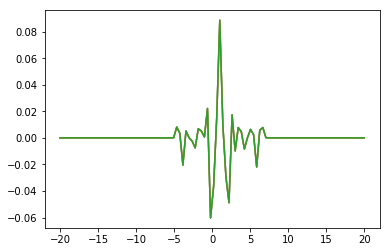

In [7]:
array = []
array1 = []
array2 = []
boundary_condition = {}
for x in np.linspace(-20, 20, 100):
    z = x + 0.1j # energy value

    coord_ = inv_mapping[(10,10,10)]
    coord = inv_mapping[(15,15,15)]
    G = np.sum((v[coord]) * np.conj(v[coord_]) / (z - w))
#     G = np.sum((v[coord]) * (v[coord_]) / (z - w))
    boundary_condition[z] = [np.sum((v[0]) * (v[coord_]) / (z - w)), 
                            np.sum((v[-1]) * (v[coord_]) / (z - w))]
#     print (G)
    array1.append (G)
    array.append (np.sum((v[coord]) * (v[coord_]) / (z - w)))
    array2.append (np.sum(np.conj(v[coord]) * (v[coord_]) / (z - w)))

# print ("array", array1)
plt.plot(np.linspace(-20, 20, 100), np.real(array1))
plt.plot(np.linspace(-20, 20, 100), np.real(array))
plt.plot(np.linspace(-20, 20, 100), np.real(array2))
plt.show()

# plt.scatter(np.linspace(-20, 20, 100), np.absolute(np.array(array2).reshape(100,) - np.array(array).reshape(100,))/np.array(array2).reshape(100,), marker = '+')

# plt.show()

# plt.scatter(np.linspace(-20, 20, 100), np.absolute(np.array(array1).reshape(100,) - np.array(array).reshape(100,))/np.array(array1).reshape(100,), marker = '+')

# plt.show()

# plt.scatter(np.linspace(-20, 20, 100), np.absolute(np.array(array2).reshape(100,) - np.array(array1).reshape(100,))/np.array(array2).reshape(100,), marker = '+')

# plt.show()

# plt.scatter(np.linspace(-20, 20, 100), np.absolute(np.array(array4).reshape(100,) - np.array(array3).reshape(100,))/np.array(array2).reshape(100,), marker = '+')

# plt.show()

# plt.scatter(np.linspace(-20, 20, 100), np.absolute(np.array(array1).reshape(100,) - np.array(array3).reshape(100,))/np.array(array1).reshape(100,), marker = '+')

# plt.show()

# plt.scatter(np.linspace(-20, 20, 100), np.absolute(np.array(array).reshape(100,) - np.array(array3).reshape(100,))/np.array(array).reshape(100,), marker = '+')

# plt.show()

    # for n in range(N):
    #     H[n, n] = e_n
    #     if n - 1 >= 0:
    #         H[n, n-1] = t_n
    #     if n + 1 < N:
    #         H[n, n+1] = t_n
    # w, v = np.linalg.eig(H)

    # G_ = np.zeros((N, N), dtype = complex)
    # for n in range(N):
    #     for n_ in range(N):
    #         G_[n, n_] = np.sum(v[n] * v[n_] / (z - w))

    # G__values.append(G_[100, 100])

    # print("Energy value:", z, "G: ", G_[100, 100])
    

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import time
from collections import OrderedDict

mapping, inv_mapping = [], []

def generate_triples(N, total):
    # List containing generated triples
    gen = []

    
    if 0 <= total <= N - 1:
        # Generate first element
        i, j, k = (0, 0, total)
        while i <= total:
            # print ("now i is", i)
            while j <= total - i:
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            j = 0
            k = total - i
            
                # pass

    elif N <= total <= 2*N - 3:
        # Generate first element
        i, j, k = (0, total-N+1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k


            
    elif 2*N - 2 <= total <= 3*N - 3:
        # Generate first element
        i, j, k = (total - 2*N + 2, N-1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k
        
    else:
        raise ValueError("Not applicable k")

    return gen

def index_triple_maps(N):
    mapping = {}
    inv_mapping = {}
    for k in range(3*N - 2):
        triples = generate_triples(N, k)
        coords = OrderedDict()
        inv_coords = OrderedDict()
        for i in range(len(triples)):
            coords[i] = triples[i]
            inv_coords[triples[i]] = i
        mapping[k] = coords
        inv_mapping[k] = inv_coords
    return mapping, inv_mapping

def omit_sites(inv_mapping, omit):    
    site = 0
    new_inv_map = {}
    new_map = {}
    
    for sum_ in inv_mapping.keys():
        inv_sum_k_sites = {}
        sum_k_sites = {}
        site_index = 0
        for triple in inv_mapping[sum_].keys():
            if omit[site] == 1:
                inv_sum_k_sites[triple] = site_index
                sum_k_sites[site_index] = triple
                site_index += 1
            else:
                x, y, z = triple
#                 print ("I'm omitting", triple)
            site += 1
        new_inv_map[sum_] = inv_sum_k_sites
        new_map[sum_] = sum_k_sites

    return new_map, new_inv_map, x, y, z

def _calculate(z_n, x_, y_, z_, x_o, y_o, z_o, t_n = 1.0, e_n = 1.0, N = 20, k = 1, c = complex,
                           mapping = mapping, inv_mapping = inv_mapping):

    

    amplitude = t_n / (z_n - e_n)
    # amplitude = 1
    a = {}
    b = {}


    for k in range(3*N-2):
        alpha_num_entries = len(inv_mapping[k-1]) if k > 0 else 0
        my_entries = len(inv_mapping[k])
        beta_num_entries = len(inv_mapping[k+1]) if k < 3*N - 3 else 0
        a_k = np.zeros((my_entries, alpha_num_entries), dtype=c)
        b_k = np.zeros((my_entries, beta_num_entries), dtype=c)
        for index, triple in mapping[k].items():
            x, y, z = triple

            # Calculate b_k
            if k < 3*N - 3:
                if x < N - 1:
                    try:
                        b_k[index, inv_mapping[k + 1][x + 1, y, z]] = amplitude
                    except:
                        pass
                    
                if y < N - 1:
                    try:
                        b_k[index, inv_mapping[k + 1][x, y + 1, z]] = amplitude
                    except:
                        pass

                if z < N - 1:
                    try:
                        b_k[index, inv_mapping[k + 1][x, y, z + 1]] = amplitude
                    except:
                        pass
#             # Calculate a_k
            if 0 < k:
                if x > 0:
                    try:
                        a_k[index, inv_mapping[k - 1][x - 1, y, z]] = amplitude
                    except:
                        pass

                if y > 0:
                    try:
                        a_k[index, inv_mapping[k - 1][x, y - 1, z]] = amplitude
                    except:
                        pass

                if z > 0:
                    try:
                        a_k[index, inv_mapping[k - 1][x, y, z - 1]] = amplitude
                    except:
                        pass

        a[k] = a_k
        b[k] = b_k

    # Calculate C
    sum_ = sum([x_, y_, z_])
    
    C = np.zeros(shape = (len(inv_mapping[sum_]), 1), dtype = complex)
    C[inv_mapping[sum_][(x_, y_, z_)]] = 1. / (z_n - e_n)
    
        



    # Calculate Multiplicative Factors 
    A = {}
    G = {}
    A[1] = b[1]
    
    for k in range(2, sum_):
        A[k] = np.linalg.solve(np.eye(len(inv_mapping[k])) - a[k].dot(A[k - 1]), b[k])


    A[3*N - 4] = a[3*N - 4]
    for k in range(3*N - 5, sum_, -1):
        A[k] = np.linalg.solve(np.eye(len(inv_mapping[k])) - b[k].dot(A[k + 1]), a[k])

    
    # Calculate Green's Functions
    V = {}
    k = sum_
    if 1 < k < 3*N-4:
        V[k] = np.linalg.solve(np.eye(len(inv_mapping[k])) - a[k].dot(A[k - 1]) - b[k].dot(A[k + 1]), 
                            C)
    elif k == 1:
        V[k] = np.linalg.solve(np.eye(len(inv_mapping[k])) - b[k].dot(A[k + 1]), 
                            C)
    elif k == 3*N - 4:
        V[k] = np.linalg.solve(np.eye(len(inv_mapping[k])) - a[k].dot(A[k - 1]), 
                            C)
            
    
    # if x_t + y_t + z_t > sum_:
    for k in range(sum_ + 1, 3*N - 3):
        V[k] = A[k].dot(V[k - 1])
    # elif x_t + y_t + z_t < sum_:
    for k in range(sum_ - 1, 0, -1):
        V[k] = A[k].dot(V[k + 1])

    # return V[x_t + y_t + z_t]
    return V

N=20
mapping, inv_mapping = index_triple_maps(N)
x_, y_, z_ = ()

In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt

def num_entries(k, N):
    if 0 <= k <= N - 1:
        return int(1./2 * (k+1) * (k+2))
    elif N <= k <= 2*N - 3:
        return int(1./2 * (-2*k**2 + 6*k*N - 6*k - 3*N**2 +9*N - 4))
    elif 2*N - 2 <= k <= 3*N - 3:
        return int(1./2 * (3*N - 2 - k) * (3*N - 1 - k))
    else:
        return 0


def generate_triples(N, total):
    # List containing generated triples
    gen = []

    # Generate first element
    if 0 <= total <= N - 1:
        i, j, k = (0, 0, total)
        while i <= total:
            # print ("now i is", i)
            while j <= total - i:
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            j = 0
            k = total - i
            
                # pass

    elif N <= total <= 2*N - 3:
        i, j, k = (0, total-N+1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k


            
    elif 2*N - 2 <= total <= 3*N - 3:
        i, j, k = (total - 2*N + 2, N-1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k
        
    else:
        raise ValueError("Not applicable k")

    return gen

def index_triple_maps(N):
    mapping = {}
    inv_mapping = {}
    for k in range(3*N - 2):
        triples = generate_triples(N, k)
        mapping[k] = {i: triples[i] for i in range(len(triples))}
        inv_mapping[k] = {triples[i]: i for i in range(len(triples))}
    return mapping, inv_mapping



N = 20

mapping, inv_mapping = index_triple_maps(N)
def calculate6_8_9_g_3_4_7(z_n, t_n = 1.0, e_n = 1.0, N = 20, k = 1, c = complex,
                          boundary_condition = boundary_condition,
                           mapping = mapping, inv_mapping = inv_mapping):

    

    amplitude = t_n / (z_n - e_n)
    # amplitude = 1
    a = {}
    b = {}


    tic = time.time()
    for k in range(3*N-2):
        alpha_num_entries = num_entries(k - 1, N)
        my_entries = num_entries(k, N)
        beta_num_entries = num_entries(k + 1, N)
        a_k = np.zeros((my_entries, alpha_num_entries), dtype=c)
        b_k = np.zeros((my_entries, beta_num_entries), dtype=c)
        for index, triple in mapping[k].items():
            x, y, z = triple

            # Calculate b_k
            if k < 3*N - 3:
                if x < N - 1:
                    b_k[index, inv_mapping[k + 1][x + 1, y, z]] = amplitude

                if y < N - 1:
                    b_k[index, inv_mapping[k + 1][x, y + 1, z]] = amplitude

                if z < N - 1:
                    b_k[index, inv_mapping[k + 1][x, y, z + 1]] = amplitude

            # Calculate a_k
            if 0 < k:
                if x > 0:
                    a_k[index, inv_mapping[k - 1][x - 1, y, z]] = amplitude

                if y > 0:
                    a_k[index, inv_mapping[k - 1][x, y - 1, z]] = amplitude

                if z > 0:
                    a_k[index, inv_mapping[k - 1][x, y, z - 1]] = amplitude

        a[k] = a_k
        b[k] = b_k

    # Calculate C
    x_, y_, z_ = (10,10,10)
    sum_ = sum([x_, y_, z_])
    C = np.zeros(shape = (num_entries(sum_, N), 1), dtype = complex)
    C[inv_mapping[sum_][(x_, y_, z_)]] = 1. / (z_n - e_n)



    # Calculate Multiplicative Factors 
    A = {}
    G = {}
    A[1] = b[1]
    G[1] = a[1].dot(boundary_condition[z_n][0])
    
    for k in range(2, sum_):
        A[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]), b[k])
        G[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]), (a[k].dot(G[k-1]))) 
#         print (k, A[k].shape)


    A[3*N - 4] = a[3*N - 4]
    G[3*N - 4] = b[3*N - 4].dot(boundary_condition[z_n][1])
    # print (a[3*N - 3])
    for k in range(3*N - 5, sum_, -1):
        A[k] = np.linalg.solve(np.eye(num_entries(k, N)) - b[k].dot(A[k + 1]), a[k])
        G[k] = np.linalg.solve(np.eye(num_entries(k, N)) - b[k].dot(A[k + 1]), (b[k].dot(G[k+1]))) 
#         print (k, A[k].shape)

    
    # Calculate Green's Functions
    V = {}
    k = sum_
    V[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]) - b[k].dot(A[k + 1]), 
                           a[k].dot(G[k-1]) + b[k].dot(G[k+1]) +C)
#     print (a[k].shape, G[k-1].shape, (a[k].dot(G[k-1])).shape)
#     print (b[k].shape, G[k+1].shape, (b[k].dot(G[k+1])).shape)
#     print (C.shape)
#     print ("Vk", V[k].shape)
#     print ((a[k].dot(G[k-1]) + b[k].dot(G[k+1]) +C).shape)
    # print(k, V[k])
    # for k in range(sum_ + 1, 3*N - 2):
    for k in range(sum_ + 1, 46):
        V[k] = G[k] + A[k].dot(V[k - 1])
#         print(k, V[k].shape)


    toc = time.time()  
    print (toc-tic)
    return V[45][inv_mapping[45][(15,15,15)]]

array4 = []
for w in np.linspace(-20, 20, 100):
    array4.append (calculate6_8_9_g_3_4_7(w+0.1j, N = 20))


# print (inv_mapping[sum_])
# print (inv_mapping[sum_][(x_, y_, z_)])



# N = range(2, 200, 10)
# my_time = [] 
# for n in N:
#     tic = time.time()
#     for k in range(3*n - 2):
#         generate_triples(n, k)
#     toc = time.time()
#     print (n, toc-tic)
#     my_time.append(toc-tic)

# plt.plot(N, my_time)
# plt.show()
# print (generate_triples(10, 18))



0.5185549259185791
0.49408698081970215
0.614656925201416
0.6775529384613037
0.5602428913116455
0.4153580665588379
0.7292890548706055
0.45774197578430176
0.44496989250183105
0.41998720169067383
0.436215877532959
0.6407418251037598
0.520827054977417
0.4054257869720459
0.36969590187072754
0.3464367389678955
0.40037989616394043
0.34720516204833984
0.3802628517150879
0.38633298873901367
0.35442590713500977
0.35198426246643066
0.3698089122772217
0.39458489418029785
0.39839625358581543
0.35748815536499023
0.3839449882507324
0.3899531364440918
0.37484002113342285
0.3936190605163574
0.40846800804138184
0.4021589756011963
0.37203097343444824
0.3791320323944092
0.36483192443847656
0.37244701385498047
0.3790431022644043
0.5139100551605225
0.3803722858428955
0.38126635551452637
0.37188196182250977
0.3680250644683838
0.3668398857116699
0.39746594429016113
0.37201929092407227
0.36510205268859863
0.3699960708618164
0.376878023147583
0.3919031620025635
0.40526890754699707
0.3732309341430664
0.398998022

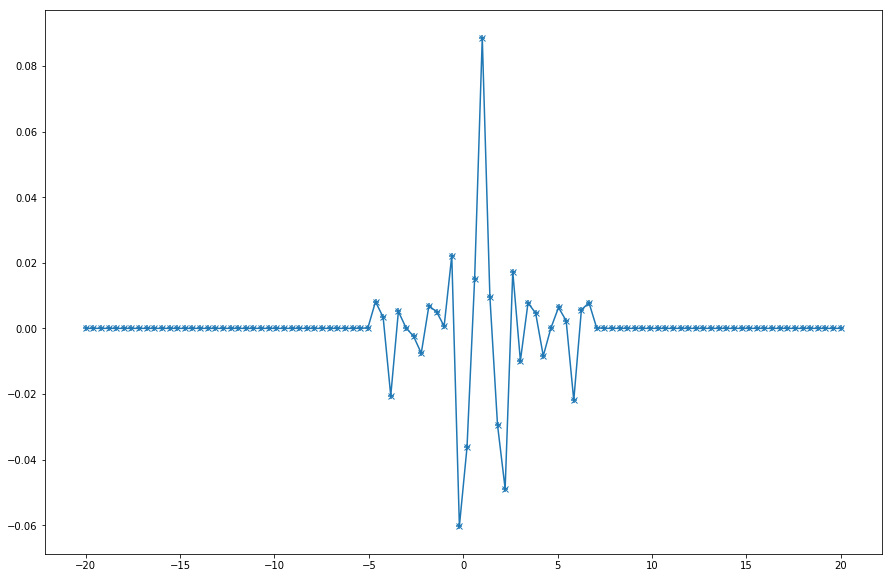

In [15]:
# plt.plot(np.linspace(-20, 20, 100), np.real(array3), color='r')
plt.figure(figsize=(15,10))
plt.plot(np.linspace(-20, 20, 100), np.real(array4), marker = "x")
plt.scatter(np.linspace(-20, 20, 100), np.real(array), marker = "+")
plt.show()

In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt

def num_entries(k, N):
    if 0 <= k <= N - 1:
        return int(1./2 * (k+1) * (k+2))
    elif N <= k <= 2*N - 3:
        return int(1./2 * (-2*k**2 + 6*k*N - 6*k - 3*N**2 +9*N - 4))
    elif 2*N - 2 <= k <= 3*N - 3:
        return int(1./2 * (3*N - 2 - k) * (3*N - 1 - k))
    else:
        return 0


def generate_triples(N, total):
    # List containing generated triples
    gen = []

    # Generate first element
    if 0 <= total <= N - 1:
        i, j, k = (0, 0, total)
        while i <= total:
            # print ("now i is", i)
            while j <= total - i:
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            j = 0
            k = total - i
            
                # pass

    elif N <= total <= 2*N - 3:
        i, j, k = (0, total-N+1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k


            
    elif 2*N - 2 <= total <= 3*N - 3:
        i, j, k = (total - 2*N + 2, N-1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k
        
    else:
        raise ValueError("Not applicable k")

    return gen

def index_triple_maps(N):
    mapping = {}
    inv_mapping = {}
    for k in range(3*N - 2):
        triples = generate_triples(N, k)
        mapping[k] = {i: triples[i] for i in range(len(triples))}
        inv_mapping[k] = {triples[i]: i for i in range(len(triples))}
    return mapping, inv_mapping



N = 20

mapping, inv_mapping = index_triple_maps(N)
def calculate6_8_9_g_3_4_7(z_n, t_n = 1.0, e_n = 1.0, N = 20, k = 1, c = complex,
                          boundary_condition = boundary_condition,
                           mapping = mapping, inv_mapping = inv_mapping):

    

    amplitude = t_n / (z_n - e_n)
    # amplitude = 1
    a = {}
    b = {}


    tic = time.time()
    for k in range(3*N-2):
        alpha_num_entries = num_entries(k - 1, N)
        my_entries = num_entries(k, N)
        beta_num_entries = num_entries(k + 1, N)
        a_k = np.zeros((my_entries, alpha_num_entries), dtype=c)
        b_k = np.zeros((my_entries, beta_num_entries), dtype=c)
        for index, triple in mapping[k].items():
            x, y, z = triple

            # Calculate b_k
            if k < 3*N - 3:
                if x < N - 1:
                    b_k[index, inv_mapping[k + 1][x + 1, y, z]] = amplitude

                if y < N - 1:
                    b_k[index, inv_mapping[k + 1][x, y + 1, z]] = amplitude

                if z < N - 1:
                    b_k[index, inv_mapping[k + 1][x, y, z + 1]] = amplitude

            # Calculate a_k
            if 0 < k:
                if x > 0:
                    a_k[index, inv_mapping[k - 1][x - 1, y, z]] = amplitude

                if y > 0:
                    a_k[index, inv_mapping[k - 1][x, y - 1, z]] = amplitude

                if z > 0:
                    a_k[index, inv_mapping[k - 1][x, y, z - 1]] = amplitude

        a[k] = a_k
        b[k] = b_k

    # Calculate C
    x_, y_, z_ = (10,10,10)
    sum_ = sum([x_, y_, z_])
    C = np.zeros(shape = (num_entries(sum_, N), 1), dtype = complex)
    C[inv_mapping[sum_][(x_, y_, z_)]] = 1. / (z_n - e_n)



    # Calculate Multiplicative Factors 
    A = {}
    G = {}
    A[1] = b[1]
#     G[1] = a[1].dot(boundary_condition[z_n][0])
    
    for k in range(2, sum_):
        A[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]), b[k])
#         G[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]), (a[k].dot(G[k-1]))) 
#         print (k, A[k].shape)


    A[3*N - 4] = a[3*N - 4]
#     G[3*N - 4] = b[3*N - 4].dot(boundary_condition[z_n][1])
    # print (a[3*N - 3])
    for k in range(3*N - 5, sum_, -1):
        A[k] = np.linalg.solve(np.eye(num_entries(k, N)) - b[k].dot(A[k + 1]), a[k])
#         G[k] = np.linalg.solve(np.eye(num_entries(k, N)) - b[k].dot(A[k + 1]), (b[k].dot(G[k+1]))) 
#         print (k, A[k].shape)

    
    # Calculate Green's Functions
    V = {}
    k = sum_
    V[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]) - b[k].dot(A[k + 1]), 
                         C)
#     print (a[k].shape, G[k-1].shape, (a[k].dot(G[k-1])).shape)
#     print (b[k].shape, G[k+1].shape, (b[k].dot(G[k+1])).shape)
#     print (C.shape)
#     print ("Vk", V[k].shape)
#     print ((a[k].dot(G[k-1]) + b[k].dot(G[k+1]) +C).shape)
    # print(k, V[k])
    # for k in range(sum_ + 1, 3*N - 2):
    for k in range(sum_ + 1, 46):
        V[k] = A[k].dot(V[k - 1])
#         print(k, V[k].shape)


    toc = time.time()  
    print (toc-tic)
    return V[45][inv_mapping[45][(15,15,15)]]

array4 = []
# for w in np.linspace(-20, 20, 100):
array4.append (calculate6_8_9_g_3_4_7(1+0.1j, N = 20))
print (array4)


# print (inv_mapping[sum_])
# print (inv_mapping[sum_][(x_, y_, z_)])



# N = range(2, 200, 10)
# my_time = [] 
# for n in N:
#     tic = time.time()
#     for k in range(3*n - 2):
#         generate_triples(n, k)
#     toc = time.time()
#     print (n, toc-tic)
#     my_time.append(toc-tic)

# plt.plot(N, my_time)
# plt.show()
# print (generate_triples(10, 18))



0.47167110443115234
[array([ 0.04481747+0.j])]


In [ ]:
(np.array(array))

In [ ]:
print (array)

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import time


def num_entries(k, N):
    if 0 <= k <= N - 1:
        return int(1./2 * (k+1) * (k+2))
    elif N <= k <= 2*N - 3:
        return int(1./2 * (-2*k**2 + 6*k*N - 6*k - 3*N**2 +9*N - 4))
    elif 2*N - 2 <= k <= 3*N - 3:
        return int(1./2 * (3*N - 2 - k) * (3*N - 1 - k))
    else:
        return 0


def generate_triples(N, total):
    # List containing generated triples
    gen = []

    # Generate first element
    if 0 <= total <= N - 1:
        i, j, k = (0, 0, total)
        while i <= total:
            # print ("now i is", i)
            while j <= total - i:
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            j = 0
            k = total - i
            
                # pass

    elif N <= total <= 2*N - 3:
        i, j, k = (0, total-N+1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k


            
    elif 2*N - 2 <= total <= 3*N - 3:
        i, j, k = (total - 2*N + 2, N-1, N-1)
        while i <= N-1:
            while j <= min(N-1, total - i):
                gen.append ((i, j, k))
                j += 1
                k -= 1
            i += 1
            k = min(N-1, total - i)
            j = total - i - k
        
    else:
        raise ValueError("Not applicable k")

    return gen

def index_triple_maps(N):
    mapping = {}
    inv_mapping = {}
    for k in range(3*N - 2):
        triples = generate_triples(N, k)
        mapping[k] = {i: triples[i] for i in range(len(triples))}
        inv_mapping[k] = {triples[i]: i for i in range(len(triples))}
    return mapping, inv_mapping

def omit_sites(inv_mapping, omit):    
    site = 0
    new_inv_map = {}
    new_map = {}
    
    for sum_ in inv_mapping.keys():
        inv_sum_k_sites = {}
        sum_k_sites = {}
        site_index = 0
        for triple in inv_mapping[sum_].keys():
            if omit[site] == 1:
                inv_sum_k_sites[triple] = site_index
                sum_k_sites[site_index] = triple
                site_index += 1
            site += 1
        new_inv_map[sum_] = inv_sum_k_sites
        new_map[sum_] = sum_k_sites

    return new_map, new_inv_map



N = 5

mapping, inv_mapping = index_triple_maps(N)
omit = np.random.choice([0,1], size=125)
mapping, inv_mapping = omit_sites(inv_mapping, omit)
print (omit)
print (mapping)

tic = time.time()
def calculate(z_n, t_n = 1.0, e_n = 1.0, N = 20, k = 1, c = complex,
                           mapping = mapping, inv_mapping = inv_mapping):

    

    amplitude = 1 #t_n / (z_n - e_n)
    # amplitude = 1
    a = {}
    b = {}


    for k in range(3*N-2):
        alpha_num_entries = len(inv_mapping[k-1]) if k > 0 else 0
        my_entries = len(inv_mapping[k])
        beta_num_entries = len(inv_mapping[k+1]) if k < 3*N - 3 else 0
        a_k = np.zeros((my_entries, alpha_num_entries), dtype=c)
        b_k = np.zeros((my_entries, beta_num_entries), dtype=c)
        for index, triple in mapping[k].items():
            x, y, z = triple

            # Calculate b_k
            if k < 3*N - 3:
                if x < N - 1:
                    try:
                        b_k[index, inv_mapping[k + 1][x + 1, y, z]] = amplitude
                    except:
                        pass
                    
                if y < N - 1:
                    try:
                        b_k[index, inv_mapping[k + 1][x, y + 1, z]] = amplitude
                    except:
                        pass

                if z < N - 1:
                    try:
                        b_k[index, inv_mapping[k + 1][x, y, z + 1]] = amplitude
                    except:
                        pass
#             # Calculate a_k
            if 0 < k:
                if x > 0:
                    try:
                        a_k[index, inv_mapping[k - 1][x - 1, y, z]] = amplitude
                    except:
                        pass

                if y > 0:
                    try:
                        a_k[index, inv_mapping[k - 1][x, y - 1, z]] = amplitude
                    except:
                        pass

                if z > 0:
                    try:
                        a_k[index, inv_mapping[k - 1][x, y, z - 1]] = amplitude
                    except:
                        pass

        a[k] = a_k
        b[k] = b_k
        print (k, a_k)

#     # Calculate C
#     x_, y_, z_ = (2,3,4)
#     sum_ = sum([x_, y_, z_])
#     C = np.zeros(shape = (num_entries(sum_, N), 1), dtype = complex)
#     C[inv_mapping[sum_][(x_, y_, z_)]] = 1. / (z_n - e_n)



#     # Calculate Multiplicative Factors 
#     A = {}
#     G = {}
#     A[1] = b[1]
#     # G[1] = a[1].dot(boundary_condition[z_n][0])
    
#     for k in range(2, sum_):
#         A[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]), b[k])
#         # G[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]), (a[k].dot(G[k-1]))) 


#     A[3*N - 4] = a[3*N - 4]
#     # G[3*N - 4] = b[3*N - 4].dot(boundary_condition[z_n][1])
#     for k in range(3*N - 5, sum_, -1):
#         A[k] = np.linalg.solve(np.eye(num_entries(k, N)) - b[k].dot(A[k + 1]), a[k])
#         # G[k] = np.linalg.solve(np.eye(num_entries(k, N)) - b[k].dot(A[k + 1]), (b[k].dot(G[k+1]))) 

    
#     # Calculate Green's Functions
#     V = {}
#     k = sum_
#     V[k] = np.linalg.solve(np.eye(num_entries(k, N)) - a[k].dot(A[k - 1]) - b[k].dot(A[k + 1]), 
#                            C)

#     for k in range(sum_ + 1, 30):
#         V[k] = A[k].dot(V[k - 1])



#     return V[29][inv_mapping[29][(15,7,7)]]

# array4 = []
# # for w in np.linspace(-20, 20, 100):
array4.append (calculate(1+0.1j, N = 5, c = float))
# print (array4)
# toc = time.time()
# print ("Time taken is", toc-tic)


[0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1
 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 1 1 1 0 1]
{0: {}, 1: {0: (0, 0, 1), 1: (1, 0, 0)}, 2: {0: (0, 1, 1), 1: (1, 1, 0)}, 3: {0: (0, 0, 3), 1: (0, 3, 0), 2: (1, 0, 2), 3: (1, 1, 1), 4: (3, 0, 0)}, 4: {0: (0, 0, 4), 1: (0, 1, 3), 2: (1, 1, 2), 3: (1, 2, 1), 4: (2, 1, 1), 5: (2, 2, 0), 6: (3, 0, 1)}, 5: {0: (0, 1, 4), 1: (0, 3, 2), 2: (0, 4, 1), 3: (1, 4, 0), 4: (2, 2, 1), 5: (3, 0, 2), 6: (3, 2, 0), 7: (4, 0, 1)}, 6: {0: (0, 2, 4), 1: (0, 4, 2), 2: (1, 2, 3), 3: (2, 0, 4), 4: (2, 1, 3), 5: (2, 3, 1), 6: (3, 0, 3), 7: (3, 1, 2), 8: (3, 3, 0), 9: (4, 0, 2)}, 7: {0: (0, 3, 4), 1: (0, 4, 3), 2: (1, 3, 3), 3: (1, 4, 2), 4: (2, 4, 1), 5: (3, 0, 4), 6: (3, 4, 0), 7: (4, 0, 3), 8: (4, 2, 1), 9: (4, 3, 0)}, 8: {0: (0, 4, 4), 1: (1, 3, 4), 2: (1, 4, 3), 3: (2, 3, 3), 4: (2, 4, 2), 5: (4, 0, 4)

KeyError: (2, 3, 4)

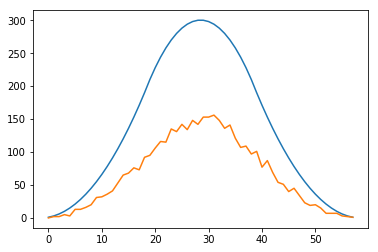

In [37]:
def num_entries(k, N):
    if 0 <= k <= N - 1:
        return int(1./2 * (k+1) * (k+2))
    elif N <= k <= 2*N - 3:
        return int(1./2 * (-2*k**2 + 6*k*N - 6*k - 3*N**2 +9*N - 4))
    elif 2*N - 2 <= k <= 3*N - 3:
        return int(1./2 * (3*N - 2 - k) * (3*N - 1 - k))
    else:
        return 0
N = 20
y = [num_entries(k, N) for k in range(3*N-2)]
plt.scatter
plt.plot(range(3*N-2), y)
plt.plot([len(new_map[k]) for k in range(len(new_map))])

In [39]:
omit = np.random.choice([0,1], size=8000)
omit[:100]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [40]:
omit_sites(inv_mapping, omit)

({0: {},
  1: {0: (0, 0, 1), 1: (1, 0, 0)},
  2: {0: (0, 1, 1), 1: (0, 2, 0), 2: (1, 1, 0)},
  3: {0: (0, 0, 3), 1: (0, 2, 1), 2: (1, 0, 2), 3: (1, 1, 1), 4: (3, 0, 0)},
  4: {0: (0, 0, 4), 1: (0, 1, 3), 2: (0, 4, 0), 3: (1, 1, 2), 4: (2, 2, 0)},
  5: {0: (0, 0, 5),
   1: (0, 1, 4),
   2: (0, 2, 3),
   3: (0, 3, 2),
   4: (1, 1, 3),
   5: (2, 0, 3),
   6: (2, 1, 2),
   7: (2, 2, 1),
   8: (3, 0, 2),
   9: (3, 1, 1),
   10: (4, 0, 1),
   11: (5, 0, 0)},
  6: {0: (0, 0, 6),
   1: (0, 2, 4),
   2: (0, 4, 2),
   3: (0, 6, 0),
   4: (1, 1, 4),
   5: (1, 2, 3),
   6: (1, 4, 1),
   7: (1, 5, 0),
   8: (2, 0, 4),
   9: (2, 2, 2),
   10: (2, 3, 1),
   11: (3, 2, 1),
   12: (3, 3, 0),
   13: (4, 0, 2),
   14: (4, 1, 1),
   15: (5, 0, 1),
   16: (6, 0, 0)},
  7: {0: (0, 0, 7),
   1: (0, 3, 4),
   2: (0, 7, 0),
   3: (1, 1, 5),
   4: (1, 2, 4),
   5: (1, 5, 1),
   6: (1, 6, 0),
   7: (2, 0, 5),
   8: (2, 1, 4),
   9: (2, 2, 3),
   10: (2, 3, 2),
   11: (3, 3, 1),
   12: (4, 0, 3),
   13: (4, 3, 0)